### Анализируем данные

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('train.csv')
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Вариант 1. Обучаем модель сначала на всех фичах + просто удаляем все пропуски
Получается бесполезная модель, которая учится на малом количестве данных. Еще у нас не отобраны признаки, просто учим модель на всем, методом "а может что-то получится"

In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# общее количество строк в исходном датасете
total_rows = len(data)
# количество строк с хотя бы одним пропуском
rows_with_missing = data[data.isnull().any(axis=1)]
# процент потерянных данных
percentage_lost = (len(rows_with_missing) / total_rows) * 100


print(f"Процент потерянных данных при удалении пропусков: {percentage_lost:.2f}%")

Процент потерянных данных при удалении пропусков: 79.46%


In [7]:
# удаляем ячейки с отсутствием данных
data = data[~(data['Age'].isna())]
data = data[~(data['Cabin'].isna())]
data = data[~(data['Embarked'].isna())]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


### Графики:

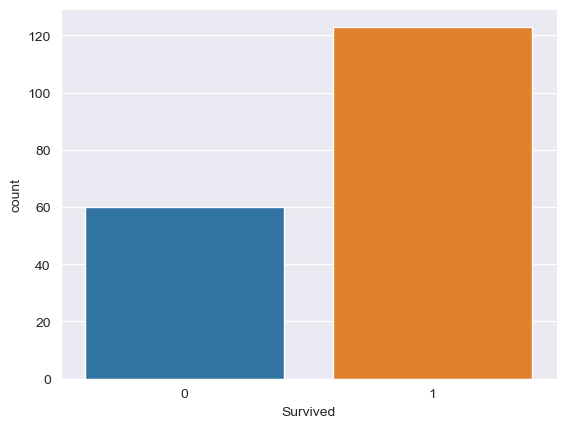

In [10]:
sns.countplot(data=data, x='Survived')
plt.show()

Процент выживших меньше, чем процент погибших. 

<AxesSubplot:xlabel='Pclass', ylabel='count'>

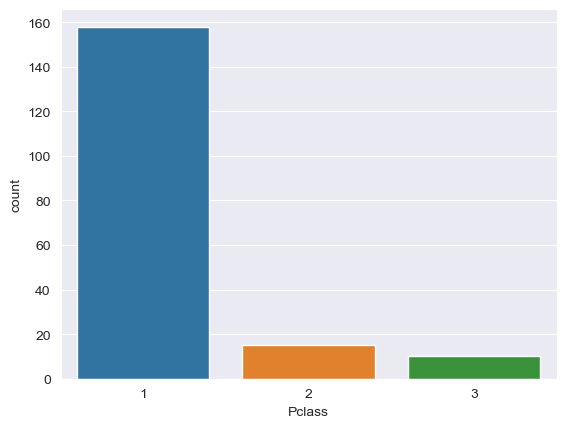

In [11]:
sns.countplot(data=data, x="Pclass")

Людей из 3 класса больше, чем из 1 и 2

In [12]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            6
        1           82
male    0           54
        1           41
Name: Survived, dtype: int64

In [13]:
#data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

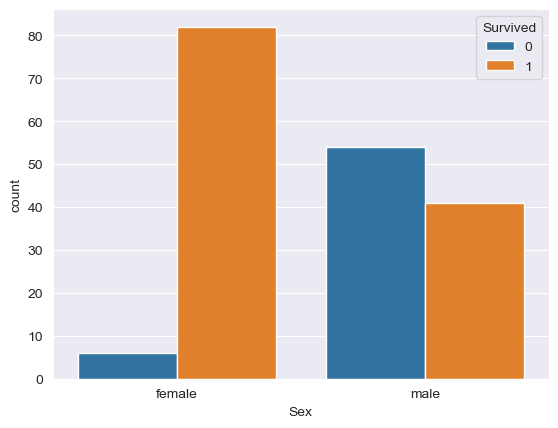

In [14]:
sns.countplot(data=data, x='Sex', hue = 'Survived')
plt.show()

Выживших женщин намного больше, чем мужчин. При том мужчин в целом больше, чем женщин

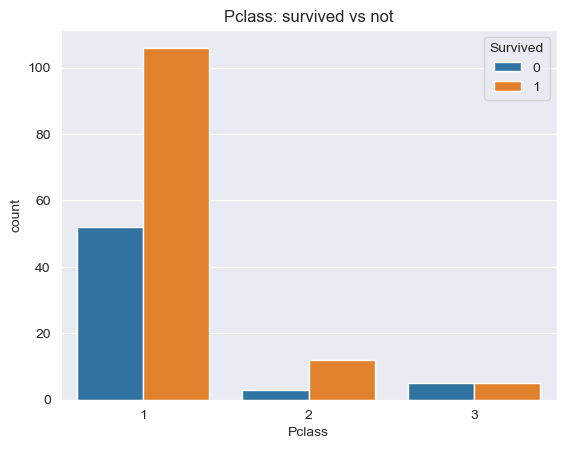

In [15]:
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Pclass: survived vs not')
plt.show()

Чем меньше число класса, тем шанс выжить больше 

In [16]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True)

Pclass             1   2   3  All
Sex    Survived                  
female 0           3   1   2    6
       1          71   8   3   82
male   0          49   2   3   54
       1          35   4   2   41
All              158  15  10  183

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [18]:
X = data[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']

In [19]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
1,2,1,38.0,1,0,71.2833
3,4,1,35.0,1,0,53.1000
6,7,1,54.0,0,0,51.8625
10,11,3,4.0,1,1,16.7000
11,12,1,58.0,0,0,26.5500


<AxesSubplot:>

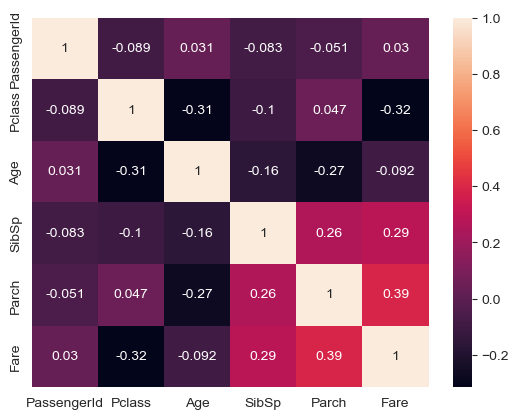

In [21]:
sns.heatmap(X.corr(), annot=True)

In [22]:
reg = LogisticRegression(max_iter=1000).fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[ 0.00142339 -0.22182579 -0.04163742  0.19770276 -0.31447471  0.00448069]]
Bias: [1.62752143]
Error: 0.28415300546448086


In [23]:
pred_values

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [24]:
reg.score(X, y)

0.7158469945355191

In [25]:
from sklearn.metrics import f1_score
f1_score(y, pred_values, average='weighted')

0.6839312584145085

Отчет по классификации показывает, что если мы берем бездумно все числовые переменные и удаляем все пропуски, то все показатели достаточно низкие  
Если посмотреть на f1_score = 0.42, то понятно, что такая модель не сможет дать достаточно корректные ответы 

In [26]:
print(classification_report(y, pred_values))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42        60
           1       0.73      0.91      0.81       123

    accuracy                           0.72       183
   macro avg       0.68      0.61      0.62       183
weighted avg       0.70      0.72      0.68       183



### Вариант 2. Отбираем фичи, но просто удаляем пропуски
Класс и пол человека имеет прямую корреляцию с целевой переменной, возраст тоже повышает точность правильных ответов модели 
SibSp - содержит информацию о количестве родственников 2-го порядка (муж, жена, братья, сетры), немного повышает точность, хотя логически (как я думаю) не должно, так что если точность в тестах будет недостаточна, то стоит п=обратить внимание на эту переменную (но сейчас у нас другая цель на этот датасет)

In [27]:
data = pd.read_csv('train.csv')

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.shape

(891, 12)

In [30]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
data = pd.read_csv('train.csv')

In [32]:
data = data[~(data['Age'].isna())]

'Embarked' - не дало никаких результатов с точки зрения точности модели, только немного ухудшились метрики 

In [33]:
X2 = data[['Pclass', 'Sex', 'Age', 'SibSp']]
y2 = data['Survived']

In [34]:
X2 = pd.get_dummies(X2, columns=['Sex'], drop_first=True)
#X2 = pd.get_dummies(X2, columns=['Embarked'], drop_first=True)

In [35]:
X2.head()

,Pclass,Age,SibSp,Sex_male
0,3,22.0,1,1
1,1,38.0,1,0
2,3,26.0,0,0
3,1,35.0,1,0
4,3,35.0,0,1


In [36]:
X2.corr()

,Pclass,Age,SibSp,Sex_male
Pclass,1.000000,-0.369226,0.067247,0.155460
Age,-0.369226,1.000000,-0.308247,0.093254
SibSp,0.067247,-0.308247,1.000000,-0.103950
Sex_male,0.155460,0.093254,-0.103950,1.000000


In [37]:
reg2 = LogisticRegression().fit(X2, y2)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values2 = reg2.predict(X2)
print('Error: {}'.format(mean_absolute_error(pred_values2, y2)))

Weights: [[ 0.00142339 -0.22182579 -0.04163742  0.19770276 -0.31447471  0.00448069]]
Bias: [1.62752143]
Error: 0.19187675070028012


In [38]:
reg2.score(X2, y2)

0.8081232492997199

In [39]:
f1_score(y2, pred_values2, average='weighted')

0.8069764552565284

Когда мы отобрали признаки, то в отчете по классификации почти все показатели повысились  
f1_score = 0.84 стал выше, что позволяет нам сделать вывод о том, что начальные данные очень важны  
Что изменилось? Мы выбрали только те переменные, которые коррелируют с целевой и удалили намного меньше данных. Если в предыдущем отчете у нас только 183 строки, то в отобранной модели у нас уже 714 строк данных без каких-либо пропусков. 

In [40]:
print(classification_report(y2, pred_values2))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       424
           1       0.78      0.73      0.76       290

    accuracy                           0.81       714
   macro avg       0.80      0.80      0.80       714
weighted avg       0.81      0.81      0.81       714


<AxesSubplot:>

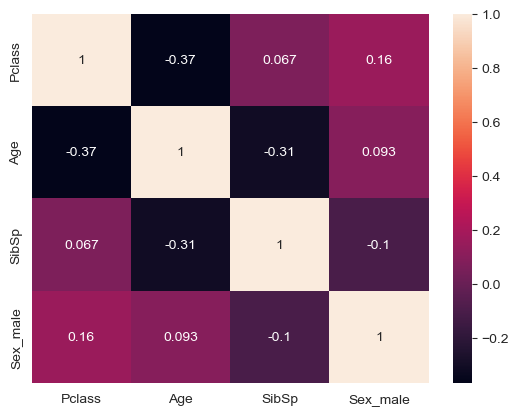

In [41]:
sns.heatmap(X2.corr(), annot=True)

### Вариант 3. Еще улучшаем модель, заполняем пропуски и пробуем перемножать признаки (или суммировать)
Возьмем все признаки, которые коррелируют с целевой переменной большим образом (но не 100%), пропущенные значения заполним средним (или медианой, в зависимости от данных). Точность модели должна улучшиться

In [42]:
data = pd.read_csv('train.csv')
data.head(15)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [44]:
data.shape

(891, 12)

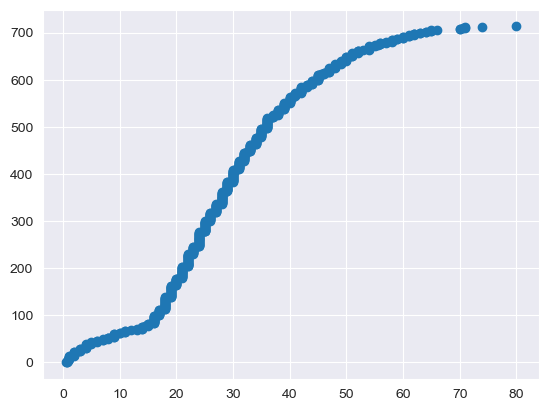

In [45]:
from numpy import sort

plt.scatter(sort(data.Age), range(len(data['Age'])))

In [46]:
data.PassengerId[data.Age.isna()].count()

177

In [47]:
data.Age = data.Age.mean()

In [48]:
data.PassengerId[data.Age.isna()].count()

0

In [50]:
data.PassengerId[data.Fare.isnull()]

Series([], Name: PassengerId, dtype: int64)

In [51]:
data = data.drop(['PassengerId','Name','Ticket','Cabin', 'Embarked', 'Fare'],axis=1)

In [52]:
data['FamilySize'] = data['SibSp'] + data['Parch']

In [53]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0,3,male,29.699118,1,0,1
1,1,1,female,29.699118,1,0,1
2,1,3,female,29.699118,0,0,0
3,1,1,female,29.699118,1,0,1
4,0,3,male,29.699118,0,0,0


In [54]:
data = pd.get_dummies(data, columns=['Sex'])

In [55]:
data['Age'] = data['Age'].astype(int)

In [56]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,Sex_female,Sex_male
0,0,3,29,1,0,1,0,1
1,1,1,29,1,0,1,1,0
2,1,3,29,0,0,0,1,0
3,1,1,29,1,0,1,1,0
4,0,3,29,0,0,0,0,1


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    891 non-null    int64
 1   Pclass      891 non-null    int64
 2   Age         891 non-null    int64
 3   SibSp       891 non-null    int64
 4   Parch       891 non-null    int64
 5   FamilySize  891 non-null    int64
 6   Sex_female  891 non-null    uint8
 7   Sex_male    891 non-null    uint8
dtypes: int64(6), uint8(2)
memory usage: 43.6 KB


In [58]:
X3 = data
y3 = data.Survived
del X3['Survived']

In [59]:
reg3 = LogisticRegression().fit(X3, y3)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values3 = reg3.predict(X3)
print('Error: {}'.format(mean_absolute_error(pred_values3, y3)))

Weights: [[ 0.00142339 -0.22182579 -0.04163742  0.19770276 -0.31447471  0.00448069]]
Bias: [1.62752143]
Error: 0.19977553310886645


In [60]:
reg3.score(X3, y3)

0.8002244668911336

In [61]:
f1_score(y3, pred_values3, average='weighted')

0.7970389937474577

In [62]:
print(classification_report(y3, pred_values3))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       549
           1       0.78      0.67      0.72       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891


In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(
    degree=2,
    include_bias=False,
    interaction_only=True
)
X = poly.fit_transform(X3)
y = y3

poly.get_feature_names_out()

array(['Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Sex_female',
       'Sex_male', 'Pclass Age', 'Pclass SibSp', 'Pclass Parch',
       'Pclass FamilySize', 'Pclass Sex_female', 'Pclass Sex_male',
       'Age SibSp', 'Age Parch', 'Age FamilySize', 'Age Sex_female',
       'Age Sex_male', 'SibSp Parch', 'SibSp FamilySize',
       'SibSp Sex_female', 'SibSp Sex_male', 'Parch FamilySize',
       'Parch Sex_female', 'Parch Sex_male', 'FamilySize Sex_female',
       'FamilySize Sex_male', 'Sex_female Sex_male'], dtype=object)

In [64]:
reg_poly = LogisticRegression(max_iter=1000).fit(X, y)
print('Weights: {}'.format(reg_poly.coef_))
print('Bias: {}'.format(reg_poly.intercept_))

pred_values = reg_poly.predict(X)
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [[-1.38397401e-03  6.11735075e-02  4.84423442e-04 -1.22799458e-04
   3.61623984e-04  4.60874101e-03 -2.49930971e-03 -4.01352464e-02
  -2.63576231e-01  2.59939465e-01 -3.63676613e-03 -5.98873521e-01
   5.97489547e-01  1.40482798e-02 -3.56118427e-03  1.04870955e-02
   1.33653489e-01 -7.24799817e-02  2.09406173e-01 -7.54318846e-02
   8.20939248e-02 -8.16095013e-02 -2.26942633e-01 -2.20229274e-01
   2.20106475e-01 -1.38135349e-01  1.38496973e-01  0.00000000e+00]]
Bias: [0.00248937]
Error: 0.19304152637485972


In [65]:
reg_poly.score(X, y)

0.8069584736251403

In [66]:
print(classification_report(y, pred_values))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       549
           1       0.79      0.67      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.78      0.79       891
weighted avg       0.81      0.81      0.80       891


Из-за того, что у нас не так много значений, то замена пропусков средним или медианой не дали значительного прироста в качестве. Можно сказать, что вторая модель, где мы осознанно выбирали признаки и удалили некоторые пустые значения будет 
лучшей в данном сравнении  